<a href="https://colab.research.google.com/github/tirenton/01/blob/main/Ittidet_NAMLAO_ch00_intro_basic_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# แนะนำไลบรารีและชุดเครื่องมือ

*(ดัดแปลงจากโน้ตบุ๊คต้นฉบับโดย ผศ.ดร.จิตร์ทัศน์ ฝักเจริญผล ภาคต้น ปีการศึกษา 2563)*

โน้ตบุ๊คนี้แสดงตัวอย่างการใช้งานไลบรารี Component Builder ที่พัฒนาขึ้นมาเพื่อใช้ศึกษาการออกแบบหน่วยประมวลผลและระบบคอมพิวเตอร์ รวมทั้งมีตัวอย่างให้ทดลองใช้ไลบรารีและเครื่องมือที่เกี่ยวข้องในการทำแบบฝึกหัด



ขั้นแรก เราต้อง `import` เครื่องมือของเราก่อน การ `import` นี้อาจจะเปลี่ยนไปแล้วแต่บทที่เรียน ซึ่งทางผู้สอนจะเตรียมคำสั่งไว้ให้แล้วในโน้ตบุ๊คแต่ละบท

In [7]:
%%capture
!rm -rf comp-sys-public-lib
!wget -q -O - https://ecourse.cpe.ku.ac.th/courses/comsys/lib/ch00.tgz | tar zxf -
!pip install -e comp-sys-public-lib
!pip install -e comp-sys-public-lib/modules/component-builder
import site; site.main()
from course_ch00_init import *

# NAND Gate

เราเตรียม NAND gate ให้เพื่อใช้เป็นเกทพื้นฐานในการสร้างเกทและวงจรอื่นต่อไป สายสัญญาณของเกทดังกล่าวแสดงดังรูปด้านล่าง

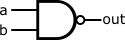

ในการใช้งานเราสามารถสร้างอ็อปเจ็กต์ของเกตดังกล่าวจากคลาส `Nand` ด้วยการเรียก `Nand()` แล้วนำมาสั่งให้ประมวลผลได้ ดังตัวอย่าง

In [2]:
nand = Nand()
nand.eval(a=T, b=F)

{'out': 1}

ในโมดูลที่อิมพอร์ตมานั้นมีการนิยามชื่อ `T` และ `F` ให้หมายถึงค่าสัญญาณดิจิทัลหนึ่งบิตที่มีลอจิก 1 และ 0 ตามลำดับ
ให้ทดลองเปลี่ยนอินพุทของเกทเป็นค่าต่าง ๆ ในโค้ดด้านบนเพื่อดูผลลัพธ์

# การติดตามสัญญาณ (Tracing)

เราสามารถติดตามค่าสัญญาณอินพุทและเอาท์พุทของเกตเพื่อนำมาตรวจสอบได้ เรียกว่าการทำ tracing ซึ่งทำได้โดยใช้ฟังก์ชัน `trace` ที่เตรียมเอาไว้ให้ โดยเรียกใช้ในรูปแบบ

    trace(ชื่ออุปกรณ์, สัญญาณอินพุทในรูปดิกต์, ลิสต์ของสัญญาณที่ต้องการตรวจสอบ)

ตัวอย่างด้านล่างแสดงการติดตามค่าสัญญาณของอุปกรณ์ชื่อ `nand` ที่สร้างขึ้นมาจากตัวอย่างที่แล้ว โดยกำหนดให้ขา `a` มีค่าเป็น 0, 0, 1, 1 และขา `b` มีค่าเป็น 0, 1, 0, 1 จากนั้นแสดงผลลัพธ์เป็นค่าสัญญาณของขา `a`, `b` และ `out`

In [8]:
trace(nand, {'a':'0011', 'b':'0101'}, ['a', 'b', 'out'])

{'a': '0011', 'b': '0101', 'out': '1110'}

ฟังก์ชัน `trace` จะสามารถติดตามการเปลี่ยนแปลงของสัญญาณเมื่อเทียบกับอินพุทของอุปกรณ์ ในส่วนถัด ๆ ไปเราจะได้เห็นวิธีการใช้ `trace` ในการติดตามสัญญาณของชิ้นส่วนย่อย ๆ ภายในอุปกรณ์แต่ละตัวด้วย

เพื่อความสะดวกในการนำผลลัพธ์จาก `trace` มาพล็อตเป็นกราฟสัญญาณ เราจะแยกสัญญาณเป็นส่วนอินพุทมาเก็บไว้ในตัวแปร และให้ `trace` ตามเฉพาะสัญญาณที่เป็นเอาท์พุท

In [4]:
# เก็บ input และ output เอาไว้เพื่อง่ายต่อการนำไปพล็อตกราฟสัญญาณ
in1 = {'a':'0011', 'b':'0101'}
out1 = trace(nand, in1, ['out'])
print(out1)

{'out': '1110'}


ฟังก์ชัน `plot_trace_inout` จะรับดิกต์ของสัญญาณโดยรับสัญญาณกลุ่มสัญญาณ 2 กลุ่ม คือกลุ่มอินพุท และกลุ่มเอาท์พุท

    plot_trace_inout(สัญญาณอินพุทในรูปดิกต์, สัญญาณเอาท์พุทในรูปดิกต์)

ตัวอย่างเช่น


In [9]:
plot_trace_inout(in1, out1)

เราสามารถรวมขั้นตอน trace และ plot เป็นขั้นตอนเดียวกันด้วยฟังก์ชัน `trace_and_plot_inout` โดยระบุอุปกรณ์และดิกต์ของสัญญาณอินพุท ฟังก์ชันนี้จะสร้าง trace และพล็อตสัญญาณอินพุทร่วมกับเอาท์พุทให้อัตโนมัติ

    trace_and_plot_inout(อ็อปเจ็กต์อุปกรณ์, สัญญาณอินพุทในรูปดิกต์)

ดังแสดงในตัวอย่างด้านล่าง

In [10]:
trace_and_plot_inout(nand, {'a':'0011', 'b': '1010'})

# การสร้างอุปกรณ์ใหม่ขึ้นจากอุปกรณ์ที่มีอยู่แล้ว

กิจกรรมในรายวิชานี้จะเป็นการสร้างเกทหรืออุปกรณ์ใหม่ขึ้นมาจากอุปกรณ์พื้นฐาน ตัวอย่างต่อไปนี้แสดงวิธีการสร้างอุปกรณ์และทดลองใช้เครื่องมือในการติดตามและพล็อตสัญญาณ


## ตัวอย่างที่ 1: สร้าง Not gate จาก Nand gate

เราจะสร้าง Not gate ขึ้นมาจาก Nand gate โดยการเชื่อมวงจรดังภาพ

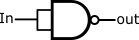

หากเราประกอบเกต `Not` บนเบรดบอร์ดด้วยชิป 74HC00 (Quad 2-Input NAND Gate) จะมีลักษณะดังภาพ โดยเบรดบอร์ดทั้งชิ้นทำหน้าที่เสมือนเกต `Not` 1 ตัว

![Not gate on breadboard](https://ecourse.cpe.ku.ac.th/courses/comsys/pics/not-gate-breadboard.png)

ในไลบรารี Component Builder เราจะออกแบบเกตใหม่ในรูปคลาสด้วยภาษาไพทอน โดยนิยามคลาส `Not` ที่ซับคลาสมาจากคลาส `Component` และต้องกำหนดคุณสมบัติ 3 อย่างให้กับคลาสได้แก่

1. `IN` - ระบุลิสต์ของชื่อสัญญาณอินพุท กรณีนี้มีเพียงขา `In`
2. `OUT` - ระบุลิสต์ของชื่อสัญญาณเอาท์พุท กรณีนี้มีเพียงขา `out`
3. `PARTS` - ระบุลิสต์ของอุปกรณ์ย่อยภายในและการเชื่อมโยงสัญญาณระหว่างอุปกรณ์ย่อย กรณีนี้คือเกต Nand 1 ตัว และสายสัญญาณ 3 เส้น

ทั้งนี้เราไม่ต้องระบุการเชื่อมต่อสายไฟเลี้ยง (VCC และ GND) เนื่องจากอุปกรณ์ทุกตัวต้องมีการจ่ายไฟเลี้ยงเสมอ

ไลบรารีรองรับการสร้างและกำหนดชื่อสายสัญญาณด้วยอ็อปเจ็กต์พิเศษชื่อ `w` (ย่อมาจาก wire factory) ในรูปแบบ `w.ชื่อสายสัญญาณ` อุปกรณ์ Not gate ตามภาพด้านบนมีสัญญาณ `In` เป็นอินพุท และ `out` เป็นเอาท์พุท ดังนั้นเราจะให้ `IN = [w.In]` และ `OUT = [w.out]` (ความจริงแล้วควรใช้ชื่อสัญญาณเป็น `in` ตัวเล็ก แต่ใช้ไม่ได้เนื่องจาก `in` เป็นคีย์เวิร์ดในภาษาไพทอน เราจึงเลือกใช้ `In` แทน `in` ไปตลอดทั้งรายวิชานี้)

ส่วนของ `PARTS` คือการระบุส่วนประกอบภายในของอุปกรณ์ พร้อมกับการเชื่อมสายสัญญาณ ซึ่งในกรณีนี้อุปกรณ์ภายในมีเพียง `Nand` gate ตัวเดียว โดยกำหนดให้ขาอินพุท a และ b ของ Nand gate เชื่อมเข้ากับสัญญาณ `w.In` ซึ่งโยงมาจากขาอินพุทของ Not gate และเชื่อมขา out ของ Nand gate เข้ากับสัญญาณ `w.out` ซึ่งโยงไปยังขาเอาท์พุทของ Not gate

ทั้งหมดนี้นำมาเขียนเป็นคลาส `Not` โดยสมบูรณ์ได้ดังโค้ดด้านล่าง

In [11]:
class Not(Component):
    IN = [w.In]
    OUT = [w.out]

    PARTS = [
        Nand(a=w.In, b=w.In, out=w.out),
    ]

เราสามารถพิมพ์ส่วนประกอบภายในของ Not gate ได้โดยสร้างอ็อปเจ็กต์ขึ้นจากคลาสแล้วเรียกฟังก์ชัน `report_parts`

In [12]:
not_gate = Not()
print(report_parts(not_gate))

Not
  Nand-1


จะเห็นว่าภายในมี Nand gate หนึ่งตัว ซึ่งเราจะเรียกว่า `Nand-1`  ส่วนอุปกรณ์ระดับบนสุดชื่อ `Not` (ตามชื่อที่ตั้งให้กับคลาส)

ลองนำ Not gate ที่สร้างขึ้นมาพล็อตสัญญาณด้วย `trace_and_plot_inout`

In [13]:
trace_and_plot_inout(not_gate, {'In':'011000111100'})

เราสามารถ `trace` สัญญาณของอุปกรณ์ย่อยภายในได้ แต่เราต้องระบุชื่ออุปกรณ์พร้อมกับชื่อสัญญาณที่ต้องการ (ดูจากผลลัพธ์ของฟังก์ชัน `report_parts`) เช่น `Not:a`, `Nand-1:a`, `Nand-1:b` เป็นต้น การติดตามสัญญาณในระดับที่ลึกขึ้นเช่นนี้ต้องมีการระบุอาร์กิวเมนต์ `level` เอาไว้ด้วย ในกรณีนี้ระบุแค่ `level=1` ก็เพียงพอ

In [ ]:
trace(not_gate,
      {'In':'011000111100'},   # สัญญาณ input
      ['Not:In', 'Nand-1:a', 'Nand-1:b', 'Nand-1:out', 'Not:out'],   # สัญญาณที่ต้องการติดตาม
      level=1)   # ระบุ level ให้ไล่ติดตามลึกลงไป 1 ชั้น

ฟังก์ชัน `trace_and_plot` อำนวยความสะดวกในการพล็อตผลการติดตามสัญญาณ
โดยระบุรายการติดตามสัญญาณในรูปดิกต์แทนลิสต์เพื่อจับกลุ่มสัญญาณ
สัญญาณจะถูกพล็อตแยกตามกลุ่มพร้อมแสดงชื่อกลุ่มกำกับไว้ด้านข้างตามที่ระบุไว้เป็นคีย์ของดิกต์

    trace_and_plot(อ็อปเจ็กต์อุปกรณ์,
                   สัญญาณอินพุทในรูปดิกต์,
                   กลุ่มสัญญาณที่ต้องการติดตามและพล็อตในรูปดิกต์,
                   level=ระดับชั้นรายละเอียด)

ตัวอย่างเช่น

In [ ]:
trace_and_plot(not_gate,
               {'In':'011000111100'},   # input
               { # ป้อนรายการติดตามสัญญาณในรูปดิกต์เพื่อจับกลุ่มสัญญาณเข้าด้วยกันเวลาพล็อต
                   'Input': ['Not:In'],
                   'Internal': ['Nand-1:a', 'Nand-1:b', 'Nand-1:out'],
                   'Output': ['Not:out'],
               },
               level=1)

## ตัวอย่างที่ 2 การเชื่อมโยงอุปกรณ์ภายใน

ด้านล่างเป็นอุปกรณ์ชื่อ `C1` ที่สร้างจาก Nand gate สองตัวและ Not gate หนึ่งตัว (แบบมั่ว ๆ) ดังภาพ

![C1 Component](https://ecourse.cpe.ku.ac.th/courses/comsys/pics/c1.png)

เขียนเป็นคลาสได้ดังโค้ดด้านล่าง สังเกตว่าสัญญาณเอาท์พุทของ Nand ตัวบน (`Nand-1`) จะโยงเข้ากับสายสัญญาณชื่อ `w.c` ซึ่งสร้างขึ้นมาเพื่อเชื่อมโยงระหว่างอุปกรณ์ภายในเท่านั้น

In [ ]:
class C1(Component):
    IN = [w.x, w.y, w.z]
    OUT = [w.out1, w.out2]

    PARTS = [
        Nand(a=w.x, b=w.y, out=w.c),
        Not(In=w.c, out=w.out1),
        Nand(a=w.c, b=w.z, out=w.out2),
    ]

เราสามารถพิมพ์ส่วนประกอบภายใน `C1` ได้ดังนี้ สังเกตว่าเราใช้ `level=2` เพื่อพิมพ์ส่วนประกอบของ `Not-2` มาด้วย (มีชื่อเป็น `Nand-2-1`)

In [ ]:
c1_gate = C1()
print(report_parts(c1_gate, level=2))

ทดลองติดตามสัญญาณได้ดังตัวอย่าง

In [ ]:
trace_and_plot(c1_gate,
               {'x':'00001111', 'y':'00110011', 'z':'01010101'},
               {'Input': ['C1:x', 'C1:y', 'C1:z'],
                'Nand-1': ['Nand-1:a', 'Nand-1:b', 'Nand-1:out'],
                'N21 (in Not-2)': ['Nand-2-1:a', 'Nand-2-1:out'],
                'Output': ['C1:out1', 'C1:out2']},
               level=2)

# สายสัญญาณแบบหลายบิต (Multi-bit)

เมื่ออุปกรณ์ซับซ้อนมากขึ้น เราจำเป็นต้องทำงานกับสัญญาณที่มีหลายบิต เราสามารถสร้างสายสัญญาณหลายบิตโดยใส่พารามิเตอร์ให้กับ `w` ในรูปแบบ `w(width)` โดยที่ `width` แทนจำนวนบิต ตัวอย่างเช่น สัญญาณ `w(2).a` จะมีความกว้าง 2 บิต และ `w(16).b` จะมีความกว้าง 16 บิต เป็นต้น

ในการเขียนระบุความกว้างสัญญาณในอุปกรณ์ สามารถระบุเพียงครั้งแรกครั้งเดียว ไลบรารีจะนำความกว้างนั้นไปใช้กับสัญญาณชื่อเดียวกันภายในนิยามคลาสของอุปกรณ์

การอ้างถึงสัญญาณในการระบุ PARTS เราสามารถเลือกใช้เป็นบิต หรือเลือกเฉือนบิตมาเพียงบางส่วนได้ โดยการระบุอินเด็กซ์แบบไพทอน เช่น `w.a[0]` แทนบิตที่ 0 ของสายสัญญาณ `a` และ `w.b[0:8]` แทนสายสัญญาณ 8 บิตล่างของ `b`

พิจารณาตัวอย่าง `Nand2` ที่เป็น Nand gate ที่รับสัญญาณความกว้าง 2 บิต

In [ ]:
class Nand2(Component):
    IN = [w(2).a, w(2).b]
    OUT = [w(2).out]

    PARTS = [
        Nand(a=w.a[0], b=w.b[0], out=w.out[0]),
        Nand(a=w.a[1], b=w.b[1], out=w.out[1]),
    ]

ในการติดตามสัญญาณ สามารถระบุค่าในรูปลิสต์ของจำนวนเต็มบวกเพื่อแทนค่าสัญญาณอินพุทแบบหลายบิตได้เลย

In [ ]:
nand2_gate = Nand2()
trace_and_plot_inout(
    nand2_gate,
    {
        'a':[0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3],
        'b':[0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3],
    },
    ['out'])

# การกำหนด PARTS โดยการโปรแกรม

บ่อยครั้งที่เราจะพบว่าการสร้างอุปกรณ์เต็มไปด้วยงานที่ซ้ำ ๆ กัน อย่างไรก็ตามเนื่องจากไลบรารีเราเป็นโค้ดภาษาไพทอน ดังนั้นในการสร้างอุปกรณ์จึงสามารถอาศัยกลไกของภาษาไพทอนเข้ามาช่วยอำนวยความสะดวกได้  

ตัวอย่างด้านล่างนิยาม `Nand2Alt` ซึ่งมีพฤติกรรมเหมือน `Nand2` ทุกประการ แต่ใช้ลูป for ของไพทอนเพื่อบรรจุ Nand gate ลงไปใน `PARTS` แทนการพิมพ์ `Nand(...)` ซ้ำหลายครั้ง

In [ ]:
class Nand2Alt(Component):
    IN = [w(2).a, w(2).b]
    OUT = [w(2).out]

    PARTS = []
    for i in range(2):
        PARTS.append(Nand(a=w.a[i], b=w.b[i], out=w.out[i]))

In [ ]:
nand2alt_gate = Nand2Alt()
trace_and_plot_inout(
    nand2alt_gate,
    {
        'a':[0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3],
        'b':[0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3],
    },
    ['out'])

# ค่าคงที่

ขณะนี้เรามีค่าคงที่ให้ใช้ในการสร้าง component สามรูปแบบคือ

* `w.T` กำหนดสัญญาณให้ทุกบิตมีค่าคงที่ 1
* `w.F` กำหนดสัญญาณให้ทุกบิตมีค่าคงที่ 0
* `w.constant(x)` กำหนดสัญญาณให้มีค่าคงที่เท่ากับจำนวนเต็ม `x`

สัญญาณคงที่เหล่านี้สามารถระบุหลายบิตได้ เช่น

* `w(8).T` เทียบเท่ากับ `11111111`
* `w(4).F` เทียบเท่ากับ `0000`
* `w(8).constant(1)` เทียบเท่ากับ `00000001`
* `w(16).constant(0xAA55)` เทียบเท่ากับ `1010101001010101`

ตัวอย่างการใช้งานแสดงด้านล่าง

In [ ]:
class AnotherNot(Component):
    IN = [w.In]
    OUT = [w.out]

    PARTS = [
        Nand(a=w.In, b=w.T, out=w.out)
    ]

not2 = AnotherNot()
trace_and_plot_inout(not2, {'In':'001101010'}, ['out'])

# สรุปรูปแบบการใช้งาน wire factory (`w`)

* ใช้ในการสร้าง component รูปแบบทั่วไปคือ `w.wirename`
* ระบุความกว้าง (width) โดยเรียก `w` เป็นฟังก์ชัน ในรูปแบบ `w(width).wirename` เช่น `w(8).a`
* ระบุความกว้างครั้งเดียว ทุก ๆ สายสัญญาณชื่อนั้นจะมีความกว้างตามที่ระบุทั้งหมด (ประหยัดการพิมพ์)
* ในการใช้งานสายสัญญาณไปเชื่อมกับอุปกรณ์ย่อยใน PARTS สามารถเลือกอินเด็กซ์หรือเฉือน (slice) สายสัญญาณได้ เช่น `w.a[0]` หรือ `w.b[0:8]`

**ข้อควรระวัง**

* ในการนิยามอุปกรณ์ด้วยไลบรารีนี้จะต้องระวังไม่ให้เกิดลูปขึ้นในวงจร ไม่เช่นนั้นระบบซิมูเลชันจะทำงานไม่ได้
* หน่วยย่อยในการนับลูปคือสายสัญญาณ ไม่ใช่บิตย่อย ๆ ในสายสัญญาณ



# โต้ตอบกับอุปกรณ์

**หมายเหตุ:** ส่วนนี้ทำงานได้กับ Google Colab เท่านั้น

ไลบรารีของรายวิชานี้เตรียมฟังก์ชัน `interact` เอาไว้ให้เพื่อจำลองอุปกรณ์ในรูปกราฟิกส์ที่สามารถโต้ตอบกับผู้ใช้ได้โดยการกดที่ขาอินพุทของอุปกรณ์ รูปแบบการใช้งานคือ

    interact(คลาสอุปกรณ์, **options)

ตัวอย่างเช่น

In [14]:
interact(Nand)

In [15]:
interact(Not)

In [ ]:
interact(C1)

เราสามารถสั่งให้แสดงอุปกรณ์ย่อยภายในได้โดยเพิ่มอาร์กิวเมนต์ `depth` ดังตัวอย่าง

In [ ]:
interact(Not, depth=1)

In [ ]:
interact(C1, depth=2)

สำหรับเกทแบบที่มีขาอินพุทแบบหลายบิต ค่าของสัญญาณจะแสดงอยู่ในรูปตัวเลขฐานสิบหก กรณีของอินพุทสามารถคลิกที่ตัวเลขเพื่อป้อนค่าใหม่ได้

In [ ]:
interact(Nand2)

## การใช้งานขั้นสูง: Layout Mixin

เราสามารถวาดเกทสวย ๆ ได้โดยผสม layout mixin เข้าไปในการนิยามคลาสอุปกรณ์ ไลบรารีสำหรับรายวิชานี้ได้มีการเตรียม layout mixin สำหรับเกทพื้นฐานเช่น Not, And, Or, และ Xor เอาไว้เรียบร้อยแล้วในโมดูล `visual_layouts`

In [ ]:
from compbuilder.visual_layouts import *

ลองนิยามคลาส `Not` ใหม่อีกรอบโดยดึงเอา `NotLayoutMixin` มาผสมลงไปด้วยดังนี้

In [ ]:
class Not(NotLayoutMixin, Component):
    IN = [w.In]
    OUT = [w.out]

    PARTS = [
        Nand(a=w.In, b=w.In, out=w.out),
    ]

เลย์เอาท์ที่ระบุไว้จะปรากฏในโหมดโต้ตอบกับอุปกรณ์ดังแสดง

In [ ]:
interact(Not)

ลองนิยาม `C1` ซ้ำอีกรอบเพื่อให้นำ `Not` ที่ผสมเลย์เอาท์ลงไปแล้วมาใช้งาน

In [ ]:
class C1(Component):
    IN = [w.x, w.y, w.z]
    OUT = [w.out1, w.out2]

    PARTS = [
        Nand(a=w.x, b=w.y, out=w.c),
        Not(In=w.c, out=w.out1),
        Nand(a=w.c, b=w.z, out=w.out2),
    ]

interact(C1,depth=1)

เลย์เอาท์ที่เตรียมไว้ให้ตอนนี้มีดังนี้

* `NotLayoutMixin`
* `AndLayoutMixin`
* `OrLayoutMixin`
* `XorLayoutMixin`

หากต้องการสร้างเลย์เอาท์ขึ้นมาเองให้ศึกษาจากโค้ดในไฟล์ `comp-sys-public-lib/modules/component-builder/compbuilder/visual_layouts.py`